# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


#load penguins and clear NA's
!pip install PalmerPenguins
from palmerpenguins import load_penguins
df = load_penguins()
clean_df = df.dropna()
df = clean_df

In [3]:
#dummify species, island, sex, and yeah in a column transformer

#set the ct transformer for all the models
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
#best model from 7.2

warnings.simplefilter('ignore', ConvergenceWarning)

X = df.drop(["bill_depth_mm"], axis=1)
y = df["bill_depth_mm"]


elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)

param_grid = {
    'elastic_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic_regression__l1_ratio': [0.2, 0.4, 0.6, 0.8, 1]
}

gscv = GridSearchCV(elastic_pipeline_1, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']
scores1 = -scores
df = pd.DataFrame({
    "Scores": scores1
})
df

,Scores
0,0.870854
1,0.870724
2,0.870971
3,0.871057
4,0.870470
5,1.004236
6,0.991890
7,0.976714
8,0.916765
9,0.865160


In [5]:
#Knn with 7 k's
warnings.simplefilter('ignore', ConvergenceWarning)


knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor())]
)

param_grid = {
    "knn_regression__n_neighbors": [1,2,3,4,5,6,7]
}

gscv = GridSearchCV(knn_pipeline_1, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']
scores2 = -scores
df = pd.DataFrame({
    "Scores": scores2
})
df

,Scores
0,1.421694
1,1.225094
2,1.150567
3,1.131143
4,1.191880
5,1.198692
6,1.197414


In [6]:
#knn with 15 k's
#Knn with 5 k's
warnings.simplefilter('ignore', ConvergenceWarning)


knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor())]
)

param_grid = {
    "knn_regression__n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

gscv = GridSearchCV(knn_pipeline_1, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']
scores3 = -scores
df = pd.DataFrame({
    "Scores": scores3
})
df

,Scores
0,1.421694
1,1.225094
2,1.150567
3,1.131143
4,1.191880
5,1.198692
6,1.197414
7,1.172302
8,1.193439
9,1.182909


In [7]:
#decision tree model
warnings.simplefilter('ignore', ConvergenceWarning)


knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree_regression", DecisionTreeRegressor())]
)

param_grid = {
    'decision_tree_regression__max_depth': [2, 5, 10],
    'decision_tree_regression__min_samples_split': [2, 5, 10],
    'decision_tree_regression__min_samples_leaf': [2, 5, 10]
}

gscv = GridSearchCV(knn_pipeline_1, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']
scores4 = -scores
df = pd.DataFrame({
    "Scores": scores4
})
df

,Scores
0,0.759931
1,0.759931
2,0.759931
3,0.759931
4,0.759931
5,0.759931
6,0.759931
7,0.759931
8,0.759931
9,0.974629


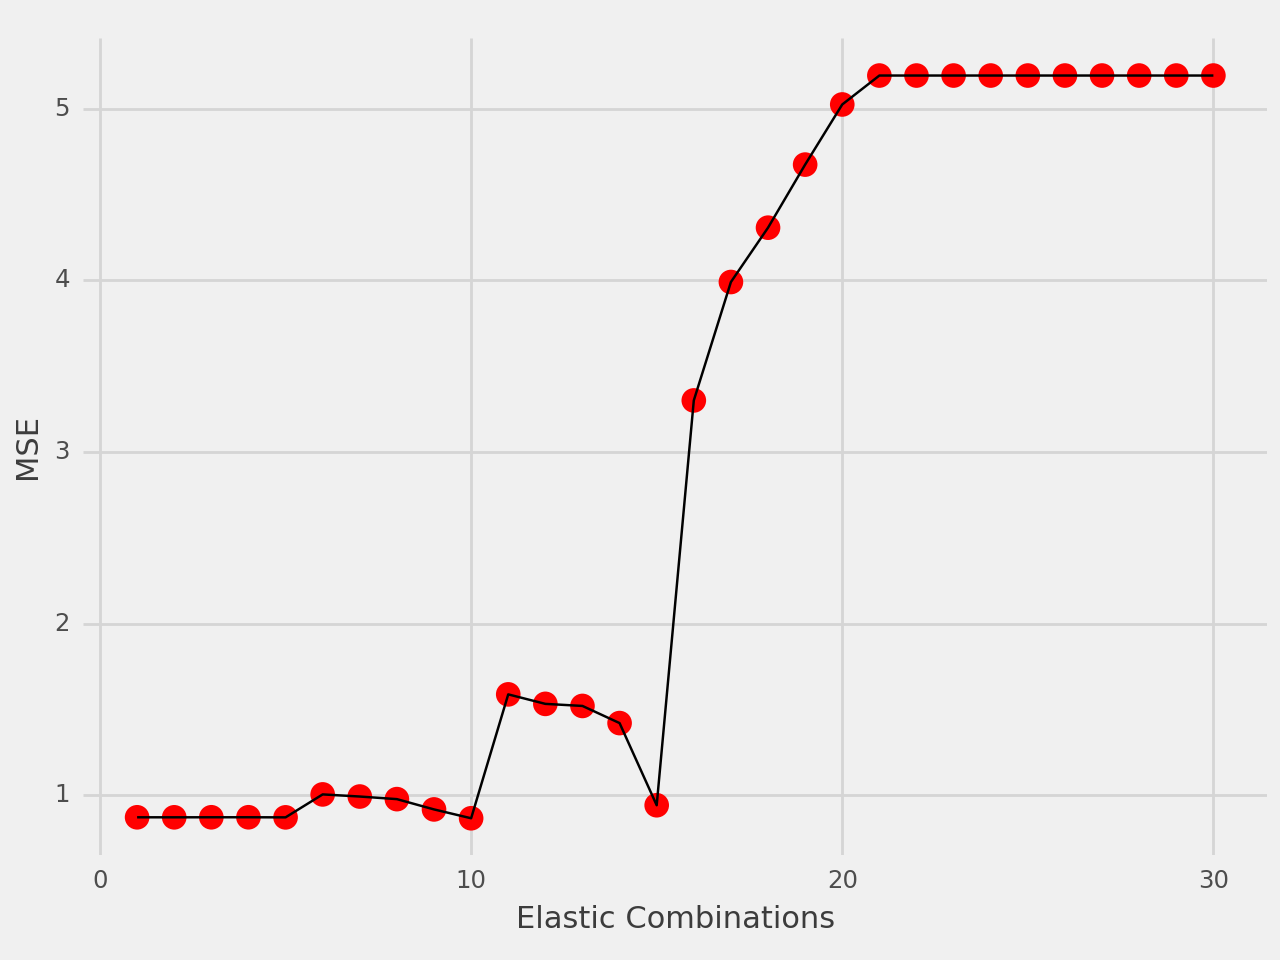

<Figure Size: (640 x 480)>

In [8]:
#plot for Elastic Net Model
import plotnine as p9
from plotnine import *
df = pd.DataFrame({
    'x': range(1, 31),
    'y': scores1
})

plot1 = (ggplot(df, aes(x='x', y='y')) +
         geom_point(size=4, color = 'red') +
         geom_line() +
         labs(x='Elastic Combinations', y='MSE') +
         theme_538()
         )
plot1

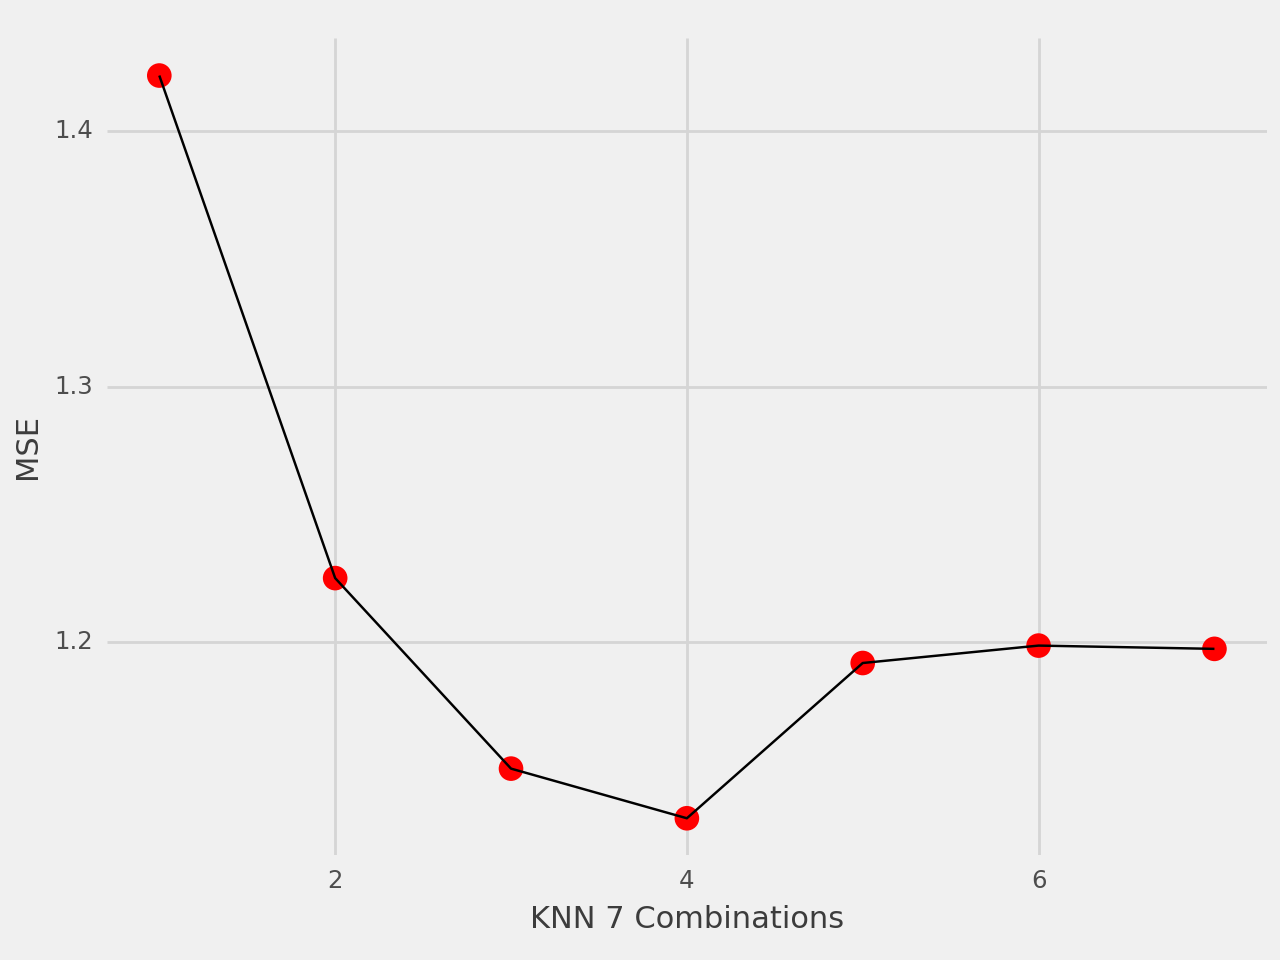

<Figure Size: (640 x 480)>

In [9]:
#plot for KNN=7 Model
import plotnine as p9
from plotnine import *
df = pd.DataFrame({
    'x': range(1, 8),
    'y': scores2
})

plot1 = (ggplot(df, aes(x='x', y='y')) +
         geom_point(size=4, color = 'red') +
         geom_line() +
         labs(x='KNN 7', y='MSE') +
         theme_538()
         )
plot1

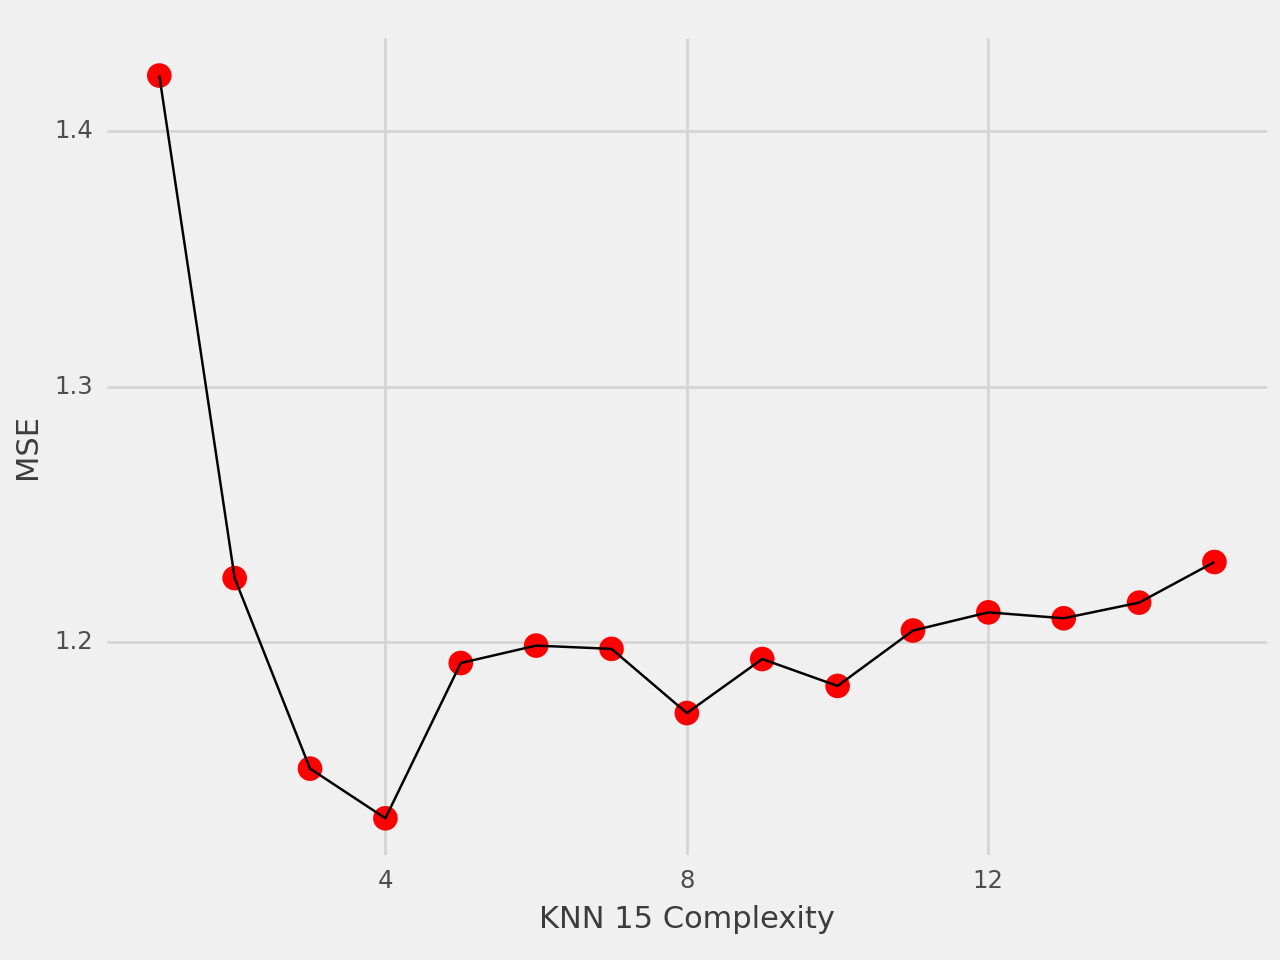

<Figure Size: (640 x 480)>

In [10]:
#plot for KNN=15 Model
import plotnine as p9
from plotnine import *
df = pd.DataFrame({
    'x': range(1, 16),
    'y': scores3
})

plot1 = (ggplot(df, aes(x='x', y='y')) +
         geom_point(size=4, color = 'red') +
         geom_line() +
         labs(x='KNN 15', y='MSE') +
         theme_538()
         )
plot1

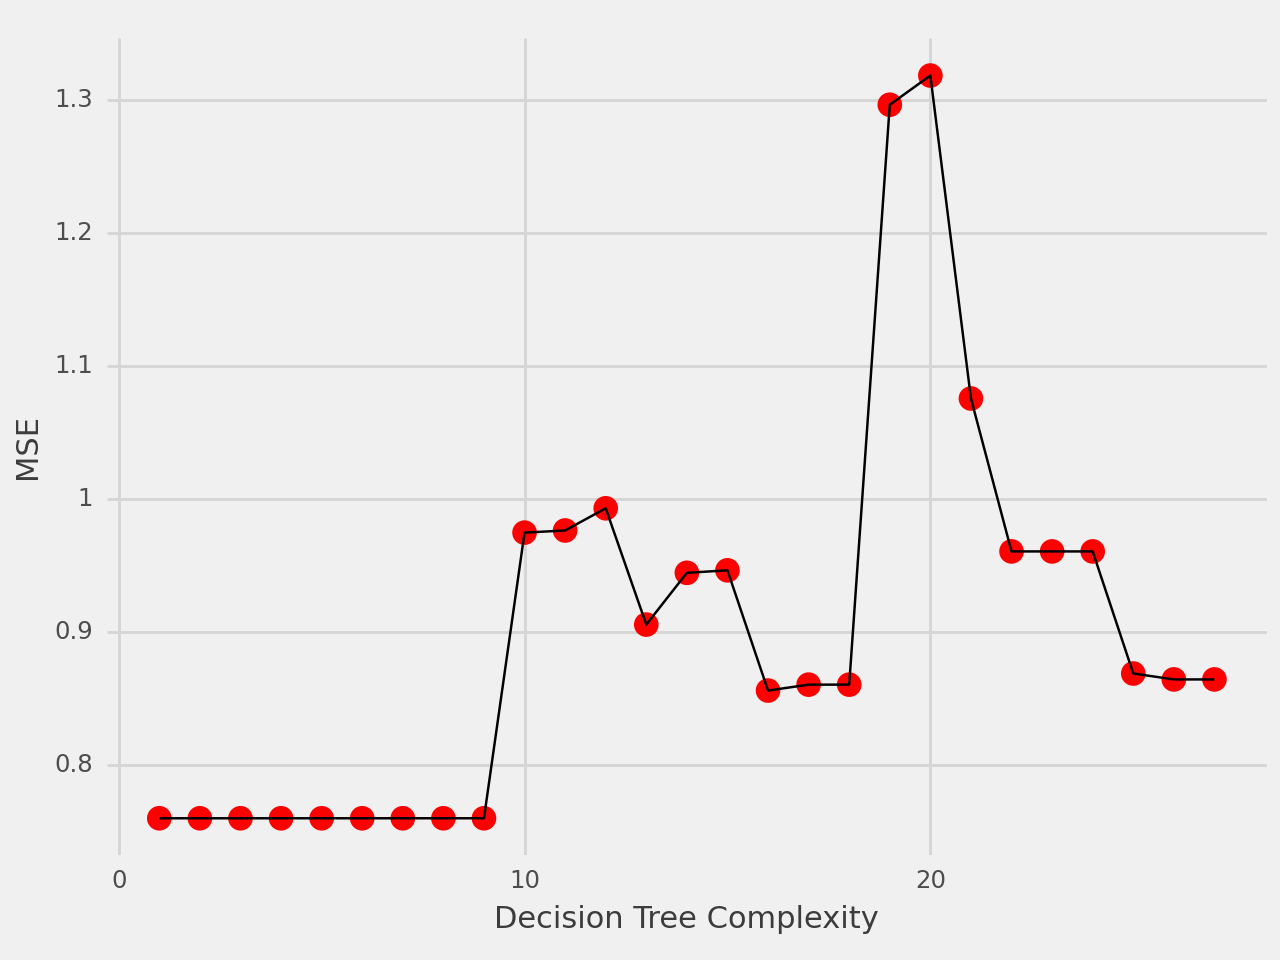

<Figure Size: (640 x 480)>

In [11]:
#plot for Decision Trees Model
import plotnine as p9
from plotnine import *
df = pd.DataFrame({
    'x': range(1, 28),
    'y': scores4
})

plot1 = (ggplot(df, aes(x='x', y='y')) +
         geom_point(size=4, color = 'red') +
         geom_line() +
         labs(x='Decision Tree Complexity', y='MSE') +
         theme_538()
         )
plot1